# Data Scientist's Handbook - I
## Exploratory Data Analysis

Imagine that you are hired by a UNL Professor to work as a data scientist in one his/her projects.

To keep things simple, assume that your task is to build a Linear Regresson model to predict student grades. There are various Machine Learning algorithms for Linear Regression. Your job is to find the best model for the given dataset.

We will have detail discussion on Regression problems, including Linear Regression. But for now. let's describe the Linear Regression problem briefly.

## Linear Regression Problem

In a typical Linear Regression problem, the target is predicted by a linear combination of the features. For example, the grades (target variable y) are assumed to be some linear combination of the features x (e.g., evaluation scores and relevant student data). Let's say that there are d such features. Then, the target is given by:

$y = intercept + w_1 * x_1 + w_2 * x_2 + ... + w_d * x_d$ 

A Linear Regression model finds suitable vaules for the intercept and the weight value w's for each feature to make correct predictions. The intercept and the weight w's are called the parameters of the model.

In the dataset, both the features (x) and the target label (y) are present.

Using a Linear Regression model, we find the intercept and weights to predict the target y.

A Linear Regression model adjusts its parameters (intercept and weights) by minimizing the error in prediction (difference between the true label y and the predicted y).


## How Should a Data Scientist Approach a Linear Regression Problem?

Well, a data scientist shouldn't immediately attempt to fit the given dataset on a Linear Regression model. He/she needs to have a good understanding of the data first.

#### Why?

Because, in general, when we hypothesize that a target is a linear combination of the avaiable d features in the dataset, this assumption could be wrong. Maybe not all features are necessary to predict the target. Some features could be redundant (because some other features has the same influence on the target), or some features may not have any correlation with the target.

Thus, before you apply regression algorithms, you need to identify the features that are redundant and are mostly correlated with the target. Your ML models will use only these effective set of features.

#### What is next after identifying the effective set of features?

Train the ML models, compare their performance and choose the model that exhibits the lowest prediction error.


#### Then, what?

Then, you need to evaluate your confidence on the predictions. You need to measure your uncertainty (or certainty) about the predictions.

You will see later that the Linear Regression models can make optimal predictions if it uses inifinitely large dataset for training. 

In practice, we don't have infinite data. So, we always have some level of uncertainty about the predictions made by the model.

As a data scientist, you have to measure this uncertainty of your model.

## Measuring the Uncertainty of a Linear Regression Model

You need to compute the uncertainty of the features in explaining the variance in the prediction. This is typically done via the Bayesian technique. So, you will have to use Bayesian technique to quantitatively understand the uncertainty of your predictions.


## What You Will Learn in this Notebook Series

You will learn to build your Machine Learning project (e.g., Linear Regression) in 3 stages:

- Stage 1: Prepare the Data for Regression through Exploratory Data Analysis
- Stage 2: Build Linear Regression Models using Scikit-learn & Compare Models
- Stage 3: Understand the Uncertainty of the Features Through Bayesian Analysis

These three stages are described in 3 notebooks, starting with the current one.

The first notebook enables you to prepare the data. This will be done via a technique called Exploratory Data Analysis (EDA).

The EDA refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Using the EDA process you will walk through every nook and cranny of the vast terrain of your data. You will meet with each dimension of the data and will pick the ones that could be useful to discover hidden patterns. This is a pre-ML step. You will touch the data, feel its sensitivity and retain only the parts that has meaningful information to reveal.

This notebook walks you through some essential steps of EDA. 


Before you begin your journey as a data scientist, make sure to load required libraries of python. Please go through the steps described in the following document: "Instructions-Getting Started With Essential Python Libraries":
https://github.com/rhasanbd/Instructions-Getting-Started-With-Essential-Python-Libraries/blob/master/Instructions-Getting%20Started%20With%20Essential%20Python%20Libraries.pdf




## Dataset


You will use data on student grades collected from a Portuguese secondary (high) school. 

This data is obtained from the UCI machine learning repository:
https://archive.ics.uci.edu/ml/datasets/Student+Performance

The data includes academic and personal characteristics of the students as well as their final grades. 

The objective is to predict the final grade from the student information which makes this a supervised, regression task. 

We have a set of training data with known labels, and we want the model to learn a mapping from the features (explanatory variables) to the target (the label), in this case the final grade. 

It is a regression task because the final grade is a continuous value.


# Exploratory Data Analysis

## 1. Create a Dataset Directory

Create a directory named “datasets” under your home directory. 

Then create a subdirectory named “DataScienceRepository”. 

Download the data and store the student-mat.csv file in this directory.

## 2. Load Data
Load the data (student-mat.csv) using Pandas. 

Pandas' read_csv() method will load the data as a Pandas DataFrame object.


In [1]:
import pandas as pd

df = pd.read_csv('/Users/hasan/datasets/DataScienceRepository/student-mat.csv')

## 3. Quick Check of the Data

Let’s take a look at the top five rows using the DataFrame’s head() method.


In [2]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 4. Description of the Data

DataFrame’s info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## 5. Dimension the Data

We need to know the dimension (number of rows and columns) of the data using DataFrame's shape method.

In [4]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)


Dimension of the data:  (395, 33)
No. of Rows: 395
No. of Columns: 33


## 6. Visualization of Data

You may plot a histogram for each numerical attribute. 

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute.

The hist() method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen. 

So before you can plot anything, you need to specify which backend Matplotlib should use. 

The simplest option is to use Jupyter’s magic command %matplotlib inline. 

This tells Jupyter to set up Matplotlib so it uses Jupyter’s own backend. 

Plots are then rendered within the notebook itself. 

Note that calling show() is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117fd55f8>,
      dtype=object)

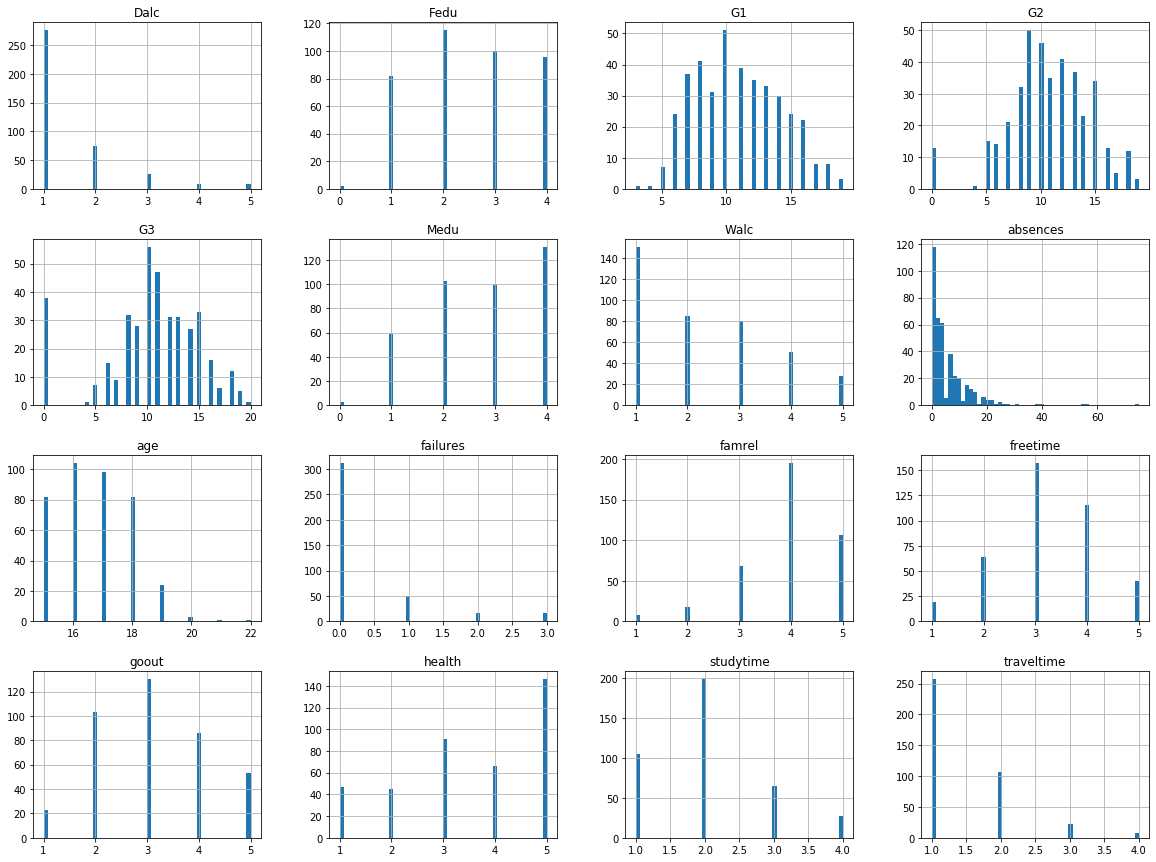

In [5]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15)) 

## 6(a). Visualize a Single Column

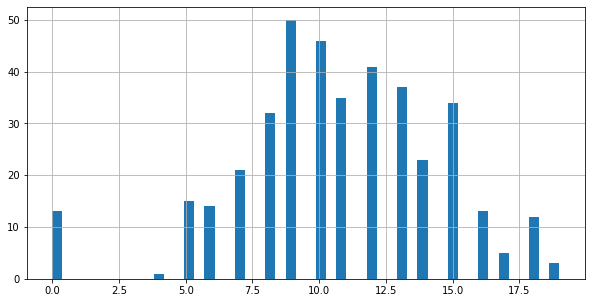

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

df['G2'].hist(bins=50, figsize=(10,5)) 

## 7. Explore the Data

To explore the data, we will do the following:

- a. Describe Columns with Numerical Attributes
- b. Describe Columns with Categorical Attributes
- c. Explore columns
- d. Check the Invalid (zero) Values in a Column



### 7 (a). Explore the Data: Describe Numerical Attributes

DataFrame's describe() method shows a summary of the numerical attributes.

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### 7(b). Describe Columns with Categorical Attributes

In [8]:
# Value Counts for Categorical Columns

# Print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: school
GP    349
MS     46
Name: school, dtype: int64

Column Name: sex
F    208
M    187
Name: sex, dtype: int64

Column Name: address
U    307
R     88
Name: address, dtype: int64

Column Name: famsize
GT3    281
LE3    114
Name: famsize, dtype: int64

Column Name: Pstatus
T    354
A     41
Name: Pstatus, dtype: int64

Column Name: Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

Column Name: Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

Column Name: reason
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

Column Name: guardian
mother    273
father     90
other      32
Name: guardian, dtype: int64

Column Name: schoolsup
no     344
yes     51
Name: schoolsup, dtype: int64

Column Name: famsup
yes    242
no     153
Name: famsup, dtype: int64

Column Name: paid
no     214
yes    181
Name: paid, dty

### 7(c). Explore the Data: Explore Columns

Check the target column "G3" that stores the final grade.

It is important to see if it has any 0 count.

In [9]:
df['G3']

0       6
1       6
2      10
3      15
4      10
5      15
6      11
7       6
8      19
9      15
10      9
11     12
12     14
13     11
14     16
15     14
16     14
17     10
18      5
19     10
20     15
21     15
22     16
23     12
24      8
25      8
26     11
27     15
28     11
29     11
       ..
365    10
366    13
367     0
368    10
369    11
370     9
371    12
372    11
373     5
374    19
375    10
376    15
377    10
378    15
379    10
380    14
381     7
382    10
383     0
384     5
385    10
386     6
387     0
388     8
389     0
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

### 7(d). Check the Invalid (zero) Values in a Column

Count the number of 0's in the target column "G3".


In [10]:
# Write a function to count 0s in a given column

count = 0

def zeroCount(dataFrame, columnName):
    noOfZeros = 0
    for i in range(dataFrame.shape[0]):
        if dataFrame[columnName][i] == 0:
            noOfZeros = noOfZeros + 1
    return noOfZeros

count = zeroCount(df, 'G3')

print("Number of 0s in the Target Column: %d" % count)

Number of 0s in the Target Column: 38


## 8. Data Cleaning

We need to clean the missing features, otherwise the ML algorithms won’t work. By "missing" we simply mean NA ("not available") or "not present for whatever reason". Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. The NaN is the default missing value marker. 

There are three techniques to clean data:
- a. Drop the "NA" Missing Feature Values
- b. Drop the "Non-NA" Missing Feature Values
- b. Replce the Missing Feature Values




### 8(a). Drop the "NA" Missing Feature Values

We exclude labels from a data set which refer to missing data (NA). 

To do this, we use DataFrame's dropna() and drop() methods.


### 8(b). Drop the "Non-NA" Missing Feature Values

Sometimes we consider some values (other than NA) as "missing" values.

For example, the value "0" in the target column is considered as a missing value. Because out of 395 data, only 38 data has zero scores as the final grade.

Hence, we drop the rows for which the "G3" column has 0 values.

In [11]:
df = df[~df['G3'].isin([0])]

### 8(c). Replce the Missing Feature Values

To replace an empty cell with zero values, we will use DataFrame’s fillna() method.

The fillna() method can "fill in" NA (Not Available) or missing values with non-NA data in a couple of ways.

For example, we can fill in the empty cells with 0 values:
df["G3"] = df["G3"].fillna(0)

Or, we can fill in the empty cells with median values:
median = df["G3"].median()
df["G3"] = df["G3"].fillna(median, inplace=True)

Since, there were no empty cells in the target column, we don't have to use the fillna() method. But it's a very useful tool to have in your toolbox for data cleaning.


## Cleaning Data with Scikit-Learn

Scikit-Learn provides a handy class to take care of missing values: Imputer. 

There are three steps to use it.

- First, we need to create an Imputer instance, specifying that we want to replace each attribute’s missing values with the median of that attribute:

from sklearn.preprocessing import Imputer 

imputer = Imputer(strategy="median")

- Note the median can only be computed on numerical attributes. So, we need to drop the categorial columns from the DataFrame object to create a new one called "df_numeric". DataFrame's drop() method can be used for this purpose.

- Finally, we fit the imputer instance to the training data using the fit() method:

imputer.fit(df_numeric)
    
    

## 9. Explore the Target column (after removing the 0 entries)

In [12]:
df['G3']

0       6
1       6
2      10
3      15
4      10
5      15
6      11
7       6
8      19
9      15
10      9
11     12
12     14
13     11
14     16
15     14
16     14
17     10
18      5
19     10
20     15
21     15
22     16
23     12
24      8
25      8
26     11
27     15
28     11
29     11
       ..
361    12
362    10
363    15
364    12
365    10
366    13
368    10
369    11
370     9
371    12
372    11
373     5
374    19
375    10
376    15
377    10
378    15
379    10
380    14
381     7
382    10
384     5
385    10
386     6
388     8
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 357, dtype: int64

## 10. Count the Number of 0s in the Target column (after removing the 0 entries)

From the output of the previous step, observe that the row indices are not contiguous.

Hence, you need to write a new function to count the 0s.

You will use the DataFrame's index.gervalues() method to get the the existing indices.


In [13]:
newCount = 0

def zeroCount(dataFrame, columnName):
    noOfZeros = 0
    for i in range(len(dataFrame.index.get_values())):
        if dataFrame[columnName][dataFrame.index.get_values()[i]] == 0:
            noOfZeros = noOfZeros + 1
    return noOfZeros

newCount = zeroCount(df, 'G3')

print("Number of 0s in the Target Column: %d" % newCount)

Number of 0s in the Target Column: 0


## 11. Rename a Column

It might be useful to rename the target column as "Grade"

In [14]:
df = df.rename(columns={'G3': 'Grade'})

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 12. Explore The Target Column

- a. Get the Column Statistics
- b. Get the Column Value_Counts
- c. Plot The Distribution of the Labels



### 12(a). Explore The Target Column: Get the Column Statistics

In [15]:
# Distribution of Grades

df['Grade'].describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: Grade, dtype: float64

### 12(b). Explore The Target Column: Get the Column Value_Counts

In [16]:
df['Grade'].value_counts()

10    56
11    47
15    33
8     32
12    31
13    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: Grade, dtype: int64

### 12(c). Explore The Target Column: Plot The Distribution of the Labels

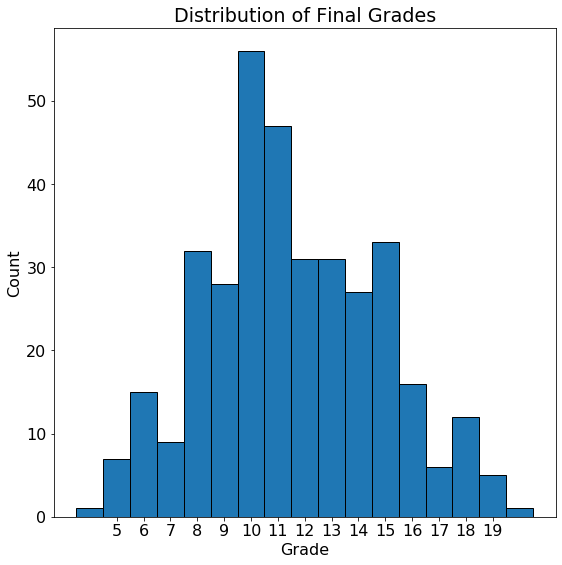

In [17]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9, 9)

# Bar plot of grades
plt.bar(df['Grade'].value_counts().index, 
        df['Grade'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); 
plt.ylabel('Count'); 
plt.title('Distribution of Final Grades');
plt.xticks(list(range(5, 20)));

## 13. Calculate & Plot Percentile for Grades

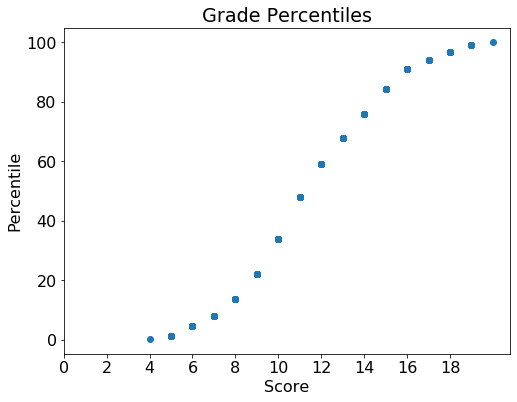

In [18]:
# Scipy helper functions
from scipy.stats import percentileofscore


# Calculate percentile for grades
df['percentile'] = df['Grade'].apply(lambda x: percentileofscore(df['Grade'], x))

# Plot percentiles for grades
plt.figure(figsize = (8, 6))

plt.plot(df['Grade'], df['percentile'], 'o')

plt.xticks(range(0, 20, 2), range(0, 20, 2))

plt.xlabel('Score'); 
plt.ylabel('Percentile'); 
plt.title('Grade Percentiles');

## 14. Looking for Numerical Correlations with the Target Column

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using DataFrame's corr() method.


In [19]:
# Variable Correlations with Final Grade

df.corr()['Grade'].sort_values(ascending=False)

Grade         1.000000
percentile    0.983823
G2            0.965583
G1            0.891805
Medu          0.190308
Fedu          0.158811
studytime     0.126728
famrel        0.037711
freetime     -0.021589
health       -0.081691
traveltime   -0.099785
age          -0.140372
Dalc         -0.140690
goout        -0.177383
Walc         -0.190054
absences     -0.213129
failures     -0.293831
Name: Grade, dtype: float64

## 15. Visualizing the Numerical Correlations 

We can visualize correlation between attributes by using use Pandas’ scatter_matrix function

It plots every numerical attribute against every other numerical attribute. 

 
Let’s focus on a few promising attributes that seem most correlated with final grade.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x81b9cdf98>,
      dtype=object)

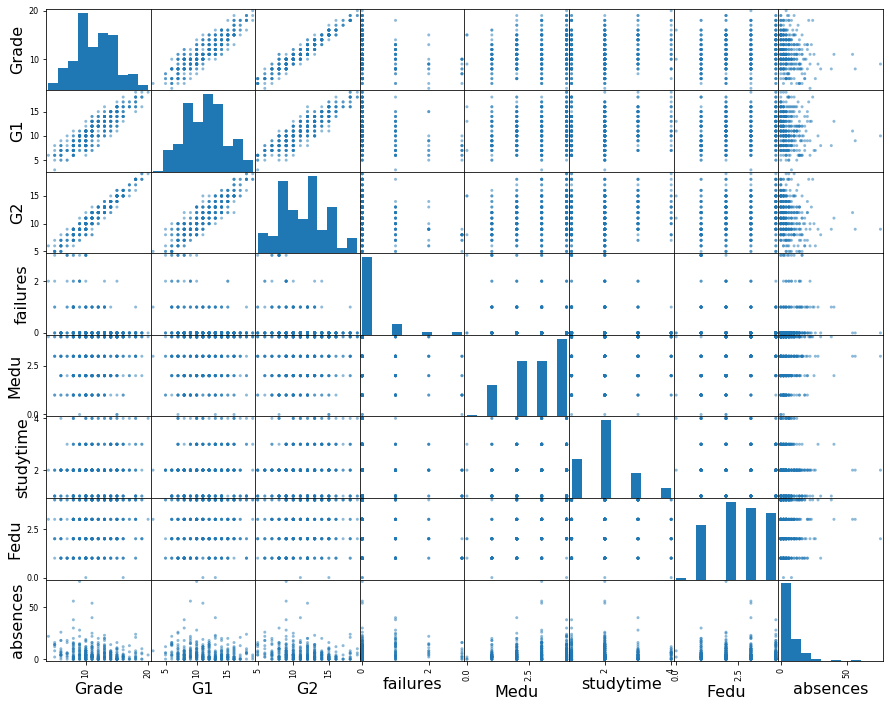

In [20]:
from pandas.plotting import scatter_matrix


attributes = ["Grade", "G1", "G2", "failures", "Medu", "studytime","Fedu", "absences"]

scatter_matrix(df[attributes], figsize=(15, 12))

## 16. Visualizing Numerical Correlation Between Two Attributes

The most promising attribute to predict the grade is G1/G2.

We can visualize this correlatio by using the scatterplot (DataGrame's plot() method)

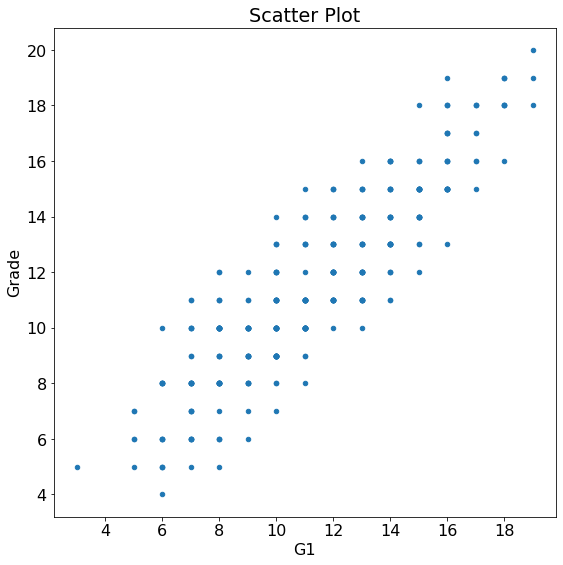

In [21]:
df.plot(title="Scatter Plot", kind="scatter", x="G1", y="Grade")

## 17. Categorical Correlations using One-Hot Encoding

In [22]:
# Select only categorical variables
category_df = df.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
dummy_df['Grade'] = df['Grade']

dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Grade
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,10


## 18. Looking for Categorical Correlations with the Target Column

In [23]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['Grade'].sort_values(ascending=False)

Grade                1.000000
schoolsup_no         0.238365
Fjob_teacher         0.158455
Mjob_health          0.134581
address_U            0.130090
higher_yes           0.113419
internet_yes         0.111624
sex_M                0.102448
Mjob_services        0.102134
school_GP            0.083615
famsup_no            0.067305
activities_yes       0.058600
reason_reputation    0.056573
romantic_no          0.049944
Mjob_teacher         0.045390
famsize_LE3          0.039744
guardian_father      0.035220
Fjob_at_home         0.028954
paid_no              0.028899
Pstatus_A            0.026665
nursery_yes          0.026541
guardian_mother      0.007728
Fjob_health          0.006241
reason_home          0.000372
reason_other        -0.003897
Fjob_services       -0.018154
nursery_no          -0.026541
Pstatus_T           -0.026665
paid_yes            -0.028899
famsize_GT3         -0.039744
romantic_yes        -0.049944
reason_course       -0.050918
activities_no       -0.058600
famsup_yes

## 18. Generating an Effective Feature Set (End Goal of EDA)

We are almost at the end of the Exploratory Data Analysis (EDA) process.

Our data exploration and visualization enabled to identify the most useful features to explain the variance in data.

The dataset could have a large number of features. However, thorugh EDA, after examining the correlation of the numeric and categorical features with the target, it appears that only a small number of features are truly correlated with the target.

Therefore, we need to generate an effective set of features.

There are three steps:

- a) Drop redundant & meaningless features
- b) Select a set of features that are highly correlated with the target.
- b) Combine some existing features (and see the correlation)






## 18(a). Generating an Effective Feature Set: Drop Redundant & Meaningless Features

Drop the features that co-vary with your target.

For example, G1, G2 & percentile co-vary with the final grade. 

Also, drop the features that are meaningless. 

For example: a student's "school" doesn't explain her/his final grade. 

In [24]:
# Drop the school and the grades from features
df = df.drop(columns=['school', 'G1', 'G2', 'percentile'])

### 18(b). Generating an Effective Feature Set: Select a Set of Features

We combine the one-hot coded categorical features with the numerical features

Finally, we only keep up to top n (= 6) mostly correlated features

In [25]:
# Combine the one-hot coded categorical features with the numerical features
df = pd.get_dummies(df)

# Find correlations with the Grade
# Note that we have considered the absolute values of the correlations
# This will help to identify the most correlated features 
most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)

# Maintain the top 7 most correlation features with Grade
most_correlated = most_correlated[:8]

print("Most Correlated Features:\n")
print(most_correlated)

Most Correlated Features:

Grade            1.000000
failures         0.293831
schoolsup_yes    0.238365
schoolsup_no     0.238365
absences         0.213129
Medu             0.190308
Walc             0.190054
goout            0.177383
Name: Grade, dtype: float64


### Observe (above) the 7 most correlated feature set

Notice that the feature "schoolsup_no" feature has the same correlation as "schoolsup_yes".

So, we will drop it in the next step.

### 18(c). Generating an Effective Feature Set: Combine a Set of Features

Try out various attribute combinations and recompute correlations.
df["G"] = df["G1"]+ df["G2"]

Based on the current data set, we don't see any benefit of combining some existing features.


## 19. Edit the DataFrame to Contain Only the Most Correlated Features

We want the DataFrame object to contain only the mostly correlated features that we have selected in the previous step.

To do this we have to slice the data.

The pandas offers at least three methods for slicing data: .loc[], .iloc[], and .ix[]. 

Here is a quick reference:

- .loc[] takes slices based on labels. This means that it will take into account the names or labels of the index when taking slices.

- .iloc[] takes slices based on index’s position. We need to indicate the positional index number to get the appropriate slice. 

- .ix[] uses both labels and positions.

We will use .ix[]. We will specify that from the DataFrame object, we need all rows (first argument) and selected columns (second argument).

The selected columns (most correlated columns) can be found by:
 most_correlated.index

In [26]:
import warnings
warnings.filterwarnings('ignore')

# See the most correlated column names
print("Most Correlated Index: ", most_correlated.index)

# Edit the DataFrame to Contain Only the Most Correlated Features¶
df = df.ix[:, most_correlated.index]
df = df.drop(columns = 'schoolsup_no') # This feature has the same correlation as schoolsup_yes


df.head()

Most Correlated Index:  Index(['Grade', 'failures', 'schoolsup_yes', 'schoolsup_no', 'absences',
       'Medu', 'Walc', 'goout'],
      dtype='object')


,Grade,failures,schoolsup_yes,absences,Medu,Walc,goout
0,6,0,1,6,4,1,4
1,6,0,0,4,1,1,3
2,10,3,1,10,1,3,2
3,15,0,0,2,4,1,2
4,10,0,0,4,3,2,2


## It is useful to check the information about the features

The data set information can be obtained from:
https://archive.ics.uci.edu/ml/datasets/Student+Performance#

- failures: number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup: extra educational support (binary: yes or no) 
- absences: number of school absences (numeric: from 0 to 93) 
- Medu: mothers education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
- Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- goout: going out with friends (numeric: from 1 - very low to 5 - very high) 


## 20. Generate Pairs Plot of Selected Variables

Now that we have created an effective set of features, we should see how they are correlated.

Note that this effective set combines numeric and categorical features.

To plot their relationships, we can use the pairs plot.

It offers a range of displays of paired combinations of categorical and quantitative variables.

A pairs plot allows us to see both distribution of single variables and relationships between two variables. 

Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python!

For using pair plot, we need to import the "seaborn" package.

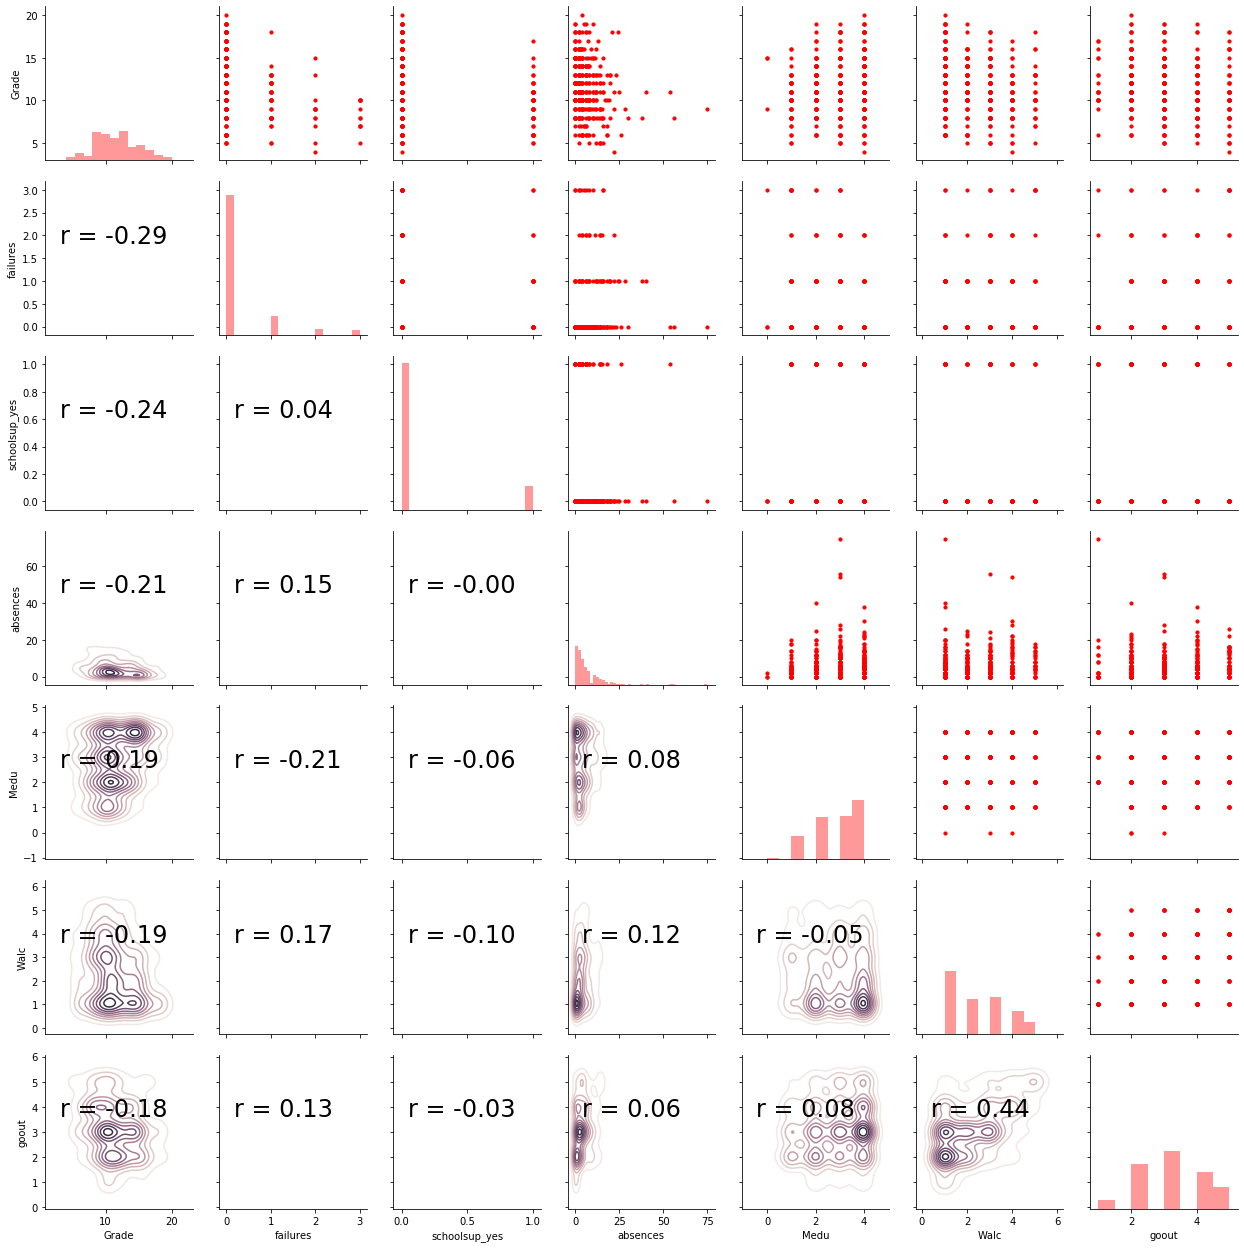

In [27]:
import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

## 21. Create a Separate Feature Set (Data Matrix X) and Target (1D Vector y)

For using the effective set of features in the ML models, it will be handy to create a data matrix (X) that contains all features and a 1D target vector (y) containing the grades.


In [28]:
# It contains all attributes (all features and the target)
allData = df


y = df['Grade'] # 1D targer vector
X = df.drop(columns='Grade')  # Data Matrix containing all features excluding the target

allData.head()

,Grade,failures,schoolsup_yes,absences,Medu,Walc,goout
0,6,0,1,6,4,1,4
1,6,0,0,4,1,1,3
2,10,3,1,10,1,3,2
3,15,0,0,2,4,1,2
4,10,0,0,4,3,2,2


# End of Exploratory Data Analysis (EDA) Process

We have successfully analyzed the given data set and have been able to identify the most useful features.

In the next notebook we will apply various regression algorithms on this modified data set.

However, before we leave it will be interesting to quickly apply Linear Regression on the data.

Python's Scikit-learn library provides implementation of a rich set of Machine Learning algorithms.

In the following, we will use Scikit-learn's Linear Regression model.

## 22. Create a Separate Test Set Data

To test the performance of the ML model (Linear Regression), we need to set aside some data (e.g., 20%) for testing.

To split the data into training and testing set, we will use Scikit-learn's train_test_split() function.


In [29]:
from sklearn.model_selection import train_test_split


# Split into training/testing sets with 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

## 23. Establish Benchmarks


### Metrics
To evaluate the performance of this regression task, we will use two standard metrics:

- Mean Absolute Error (MAE): Average of the absolute value of the difference between predictions and the true values
- Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predictions and the true values.

The mean absolute error is more interpretable, but the root mean squared error penalizes larger errors more heavily. Either one may be appropriate depending on the situation. 

In [30]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

## 24. Naive Baseline

For a regression task, a simple naive baseline is to guess the median value on the training set for all testing cases. 

If our machine learning model cannot better this simple baseline, then perhaps we should try a different approach!

In [31]:
# Naive baseline is the median

import numpy as np


median_pred = y_train.median()

print(median_pred)



median_preds = [median_pred for _ in range(len(y_test))]
true = y_test


# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

11.0
Median Baseline  MAE: 2.5417
Median Baseline RMSE: 3.1336


## 25. Linear Regression Using Scikit-learn

Using the Scikit-learn Linear Regression model is super easy.

There are 2 simple steps.

- Create the Model (linear regression object)
- Train the Model

Then, you can get the intercept and feature weights by using the "intercept_" and "coef_" methods of the Linear Regression object respectively.

Finally, you can make predictions by using the "predict" method of the Linear Regression object. You should use the test data for making predictions.

### Performance Measures of Regression Models in Scikit-learn

We can use two performance measures to evalute the regression model.


- RMSE: Scikit-Learn’s "mean_squared_error" function can be used to compute the RMSE for  the whole training set.

- r2 score: Scikit-Learn’s "r2_score" function can be used to compute another useful performance measure. It called is the coefficient of determination regression score function or the r2(r squared) score. It measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variable(s), i.e., features. The best possible score of r2 is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.



In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
model = LinearRegression()

# Train the model using the traing data and label
model.fit(X_train, y_train)

# The intercept
b = model.intercept_
print('Intercept: \n',b )

# The feature weights (coefficients) in an array
m = model.coef_
print('Coefficients: \n', m)


# Show the prediction formula with the intercept and feature weight values
print("\nPrediction Formula: ")
print(' y(predicted) = {0} +  x_1 * {1} +  x_2 * {2} + x_3 * {3} + x_4 * {4} + x_5 * {5} + x_6 * {6}'
      .format(b, m[0], m[1], m[2], m[3], m[4], m[5]))


# Make predictions using the test data
y_predicted = model.predict(X_test)


# RMSE of the model
print("\nMean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))


# Explained variance score: 1 is perfect prediction
print('\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f' % r2_score(y_test, y_predicted))


Intercept: 
 13.013672029247289
Coefficients: 
 [-1.00936319 -2.16636013 -0.06156456  0.37622689 -0.28621473 -0.27676689]

Prediction Formula: 
 y(predicted) = 13.013672029247289 +  x_1 * -1.0093631871541862 +  x_2 * -2.1663601284031575 + x_3 * -0.06156455671503731 + x_4 * 0.3762268875812214 + x_5 * -0.28621473043845014 + x_6 * -0.2767668917779893

Mean squared error: 7.01

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.27


## Analysis of the Linear Regression Performance

Now you should compare the performance metrics with the baseline estimates (median).

Observe that both the MAE and the RMSE values from the Linear Regression model is smaller than the baseline estimates.




In [33]:
import numpy as np

# Model Metrics
mae = np.mean(abs(y_predicted - y_test))
rmse = np.sqrt(np.mean((y_predicted - y_test) ** 2))

print("Linear Regression MAE: ", mae)
print("Linear Regression RMSE: ", rmse)


# Baseline Metrics
baseline = np.median(y_train)
baseline_mae = np.mean(abs(baseline - y_test))
baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))


print("\nBaseline MAE: ", baseline_mae)
print("Baseline RMSE: ", baseline_rmse)

Linear Regression MAE:  2.103324982032935
Linear Regression RMSE:  2.648486973565781

Baseline MAE:  2.5416666666666665
Baseline RMSE:  3.133599279493861


## What's Next?


In the next notebook we will use other regression models and compare their performance.
